In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parameters
L = 50  # Lattice size (LxL)
T = 0.5  # Temperature
n_steps = 200  # Number of Monte Carlo steps
J = 1.0  # Interaction strength

# Initialize the spin configuration
spins = np.random.uniform(0, 2 * np.pi, (L, L))

def energy_change(spins, i, j, theta_new):
    """Calculate the change in energy if spin at (i, j) is updated to theta_new."""
    theta_old = spins[i, j]
    delta_theta = theta_new - theta_old
    neighbors = [(i, (j+1) % L), (i, (j-1) % L), ((i+1) % L, j), ((i-1) % L, j)]
    delta_E = 0
    for ni, nj in neighbors:
        delta_E += -J * (np.cos(theta_new - spins[ni, nj]) - np.cos(theta_old - spins[ni, nj]))
    return delta_E

def metropolis_step(spins, T):
    """Perform one Metropolis step."""
    for _ in range(L * L):
        i, j = np.random.randint(0, L, 2)
        theta_new = spins[i,j] + 0.1
        delta_E = energy_change(spins, i, j, theta_new)
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            spins[i, j] = theta_new

def correlation_function(spins):
    """Compute the correlation function."""
    corrs = []
    for r in range(L // 2):
        corr = 0
        for i in range(L):
            for j in range(L):
                corr += np.cos(spins[i, j] - spins[(i+r) % L, j])
                corr += np.cos(spins[i, j] - spins[i, (j+r) % L])
        corr /= (2 * L * L)  # Average over both directions
        corrs.append(corr)
    return corrs

In [2]:
Temp = np.arange(0.5, 3.0 + 0.25, 0.25)
param_list = []

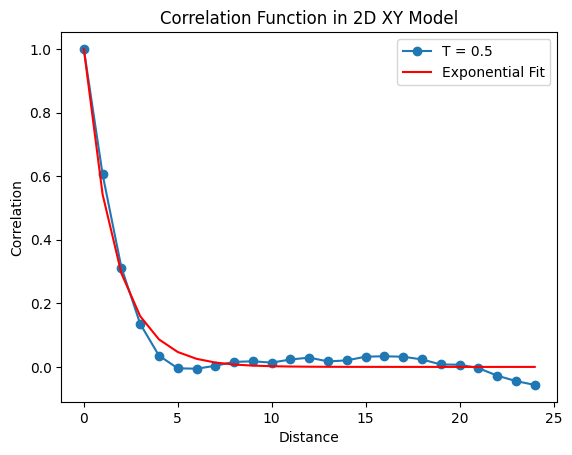

Fitted parameters: [1.63413697] temp = 0.5


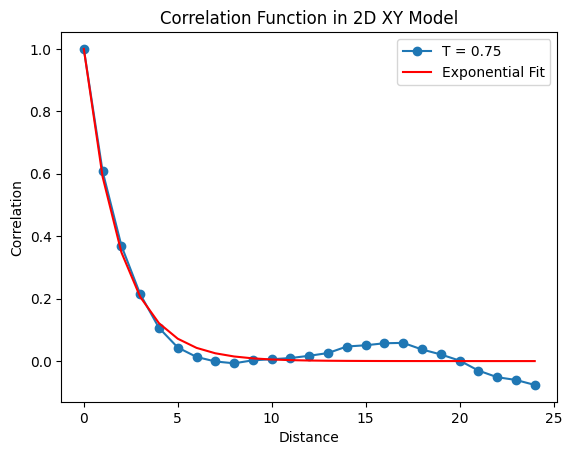

Fitted parameters: [1.89681582] temp = 0.75


/tmp/ipykernel_9905/3320381452.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(exponential_decay, distances, corrs, p0=[10])


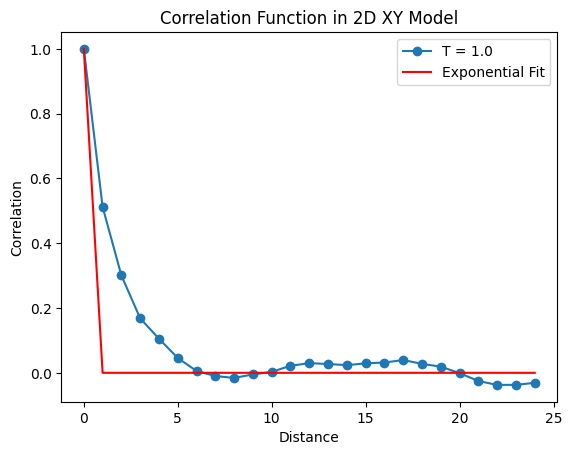

Fitted parameters: [0.01395033] temp = 1.0


KeyboardInterrupt: 

In [3]:
for T in Temp:
    # Equilibrate the system
    for _ in range(n_steps):
        metropolis_step(spins, T)

    # Compute the correlation function
    corrs = correlation_function(spins)

    # Define the exponential decay function
    def exponential_decay(r, B):
        return np.exp(-r / B)

    # Fit the data to the exponential decay function
    distances = np.arange(L // 2)
    params, covariance = curve_fit(exponential_decay, distances, corrs, p0=[10])

    # Plot the correlation TSfunction and the fit
    plt.plot(distances, corrs, 'o-', label=f'T = {T}')
    plt.plot(distances, exponential_decay(distances, *params), 'r-', label='Exponential Fit')
    plt.xlabel('Distance')
    plt.ylabel('Correlation')
    plt.title('Correlation Function in 2D XY Model')
    plt.legend()
    plt.show()
    param_list.append(params[0])

    print("Fitted parameters:", params, "temp =", T)

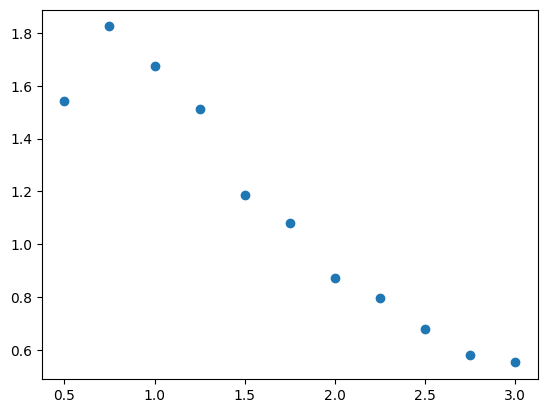

In [ ]:
plt.scatter(Temp, param_list)
plt.show()